In [1]:
import mldatasets
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [2]:
cvd_df = mldatasets.load("cardiovascular-disease")

cardiovascular-disease-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
/Users/serg/EXTEND/PROJECTS/InterpretableMLBook/programming/Chapter2/data/cardiovascular-disease-dataset.zip uncompressed to /Users/serg/EXTEND/PROJECTS/InterpretableMLBook/programming/Chapter2/data/cardiovascular-disease-dataset
1 dataset files found in /Users/serg/EXTEND/PROJECTS/InterpretableMLBook/programming/Chapter2/data/cardiovascular-disease-dataset folder
parsing /Users/serg/EXTEND/PROJECTS/InterpretableMLBook/programming/Chapter2/data/cardiovascular-disease-dataset/cardio_train.csv


In [3]:
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [4]:
cvd_df['age'] =  cvd_df['age'] / 365.24

In [5]:
cvd_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,70000.0,53.304309,6.755152,29.564122,48.36272,53.945351,58.391742,64.924433
gender,70000.0,1.349571,0.476838,1.000000,1.00000,1.000000,2.000000,2.000000
height,70000.0,164.359229,8.210126,55.000000,159.00000,165.000000,170.000000,250.000000
weight,70000.0,74.205690,14.395757,10.000000,65.00000,72.000000,82.000000,200.000000
ap_hi,70000.0,128.817286,154.011419,-150.000000,120.00000,120.000000,140.000000,16020.000000
ap_lo,70000.0,96.630414,188.472530,-70.000000,80.00000,80.000000,90.000000,11000.000000
cholesterol,70000.0,1.366871,0.680250,1.000000,1.00000,1.000000,2.000000,3.000000
gluc,70000.0,1.226457,0.572270,1.000000,1.00000,1.000000,1.000000,3.000000
smoke,70000.0,0.088129,0.283484,0.000000,0.00000,0.000000,0.000000,1.000000
alco,70000.0,0.053771,0.225568,0.000000,0.00000,0.000000,0.000000,1.000000


In [6]:
cvd_df = cvd_df[(cvd_df['ap_lo'] <= 370) & (cvd_df['ap_lo'] > 0)].reset_index(drop=True)
cvd_df = cvd_df[(cvd_df['ap_hi'] <= 370) & (cvd_df['ap_hi'] > 0)].reset_index(drop=True)
cvd_df = cvd_df[cvd_df['ap_hi'] >= cvd_df['ap_lo']].reset_index(drop=True)

In [7]:
y = cvd_df['cardio']
X = cvd_df.drop(['cardio'], axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)

In [8]:
log_model = sm.Logit(y_train, sm.add_constant(X_train))
log_result = log_model.fit()
print(log_result.summary2())

Optimization terminated successfully.
         Current function value: 0.561557
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.190     
Dependent Variable: cardio           AIC:              65618.3485
Date:               2020-06-12 12:12 BIC:              65726.0502
No. Observations:   58404            Log-Likelihood:   -32797.   
Df Model:           11               LL-Null:          -40481.   
Df Residuals:       58392            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
const         -11.1730   0.2504 -44.6182 0.0000 -11.6638 -10.6822
age             0.0510   0.0015  34.7971 0.0000   0.0482   0.0539


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [9]:
np.exp(log_result.params).sort_values(ascending=False)

cholesterol    1.637374
ap_hi          1.057676
age            1.052357
weight         1.011129
ap_lo          1.010573
height         0.996389
gender         0.977519
gluc           0.890913
smoke          0.877576
alco           0.814627
active         0.806471
const          0.000014
dtype: float64

In [10]:
np.std(X_train, 0)

age             6.757537
gender          0.476697
height          8.186987
weight         14.335173
ap_hi          16.703572
ap_lo           9.547583
cholesterol     0.678878
gluc            0.571231
smoke           0.283629
alco            0.225483
active          0.397215
dtype: float64

In [11]:
coefs = log_result.params.drop(labels=['const','gender'])
stdv = np.std(X_train, 0).drop(labels='gender')
abs(coefs * stdv).sort_values(ascending=False)

ap_hi          0.936632
age            0.344855
cholesterol    0.334750
weight         0.158651
ap_lo          0.100419
active         0.085436
gluc           0.065982
alco           0.046230
smoke          0.037040
height         0.029620
dtype: float64

In [12]:
y_pred = log_result.predict(sm.add_constant(X_test)).to_numpy()
y_pred

array([0.40629892, 0.17003609, 0.13405939, ..., 0.95575283, 0.94095239,
       0.91455717])

In [13]:
y_pred[2872]

0.5746680418975686

In [14]:
X_test.iloc[2872]

age             60.521849
gender           1.000000
height         158.000000
weight          62.000000
ap_hi          130.000000
ap_lo           80.000000
cholesterol      1.000000
gluc             1.000000
smoke            0.000000
alco             0.000000
active           1.000000
Name: 46965, dtype: float64

In [15]:
filler_feature_values = {0: 1, 1: 30, 2: 1, 3: 165, 4: 57, 5: 110, 
                       6: 70, 7: 1, 8: 1, 9: 0, 10:0, 11:1
                    }

In [16]:
filler_feature_ranges = {0: 1, 1: 35, 2: 2, 3: 110, 4: 150, 5: 140, 
                       6: 70, 7: 3, 8: 3, 9: 2, 10:2, 11:2
                      }

In [17]:
X_highlight = np.reshape(np.concatenate(([1],X_test.iloc[2872].to_numpy())), (1, 12))
X_highlight

array([[  1.        ,  60.52184865,   1.        , 158.        ,
         62.        , 130.        ,  80.        ,   1.        ,
          1.        ,   0.        ,   0.        ,   1.        ]])

In [18]:
def create_decision_plot(X, y, model, feature_index, feature_names, X_highlight, 
                         filler_feature_values, filler_feature_ranges, ax=None):
    filler_values = dict((k, filler_feature_values[k]) for k in filler_feature_values.keys() if k not in feature_index)
    filler_ranges = dict((k, filler_feature_ranges[k]) for k in filler_feature_ranges.keys() if k not in feature_index)
    ax = plot_decision_regions(sm.add_constant(X).to_numpy(), y.to_numpy(), clf=model, 
                          feature_index=feature_index,
                          X_highlight=X_highlight,
                          filler_feature_values=filler_values, 
                          filler_feature_ranges=filler_ranges, 
                          scatter_kwargs = {'s': 48, 'edgecolor': None, 'alpha': 0.7},
                          contourf_kwargs = {'alpha': 0.2}, legend=2, ax=ax)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    return ax

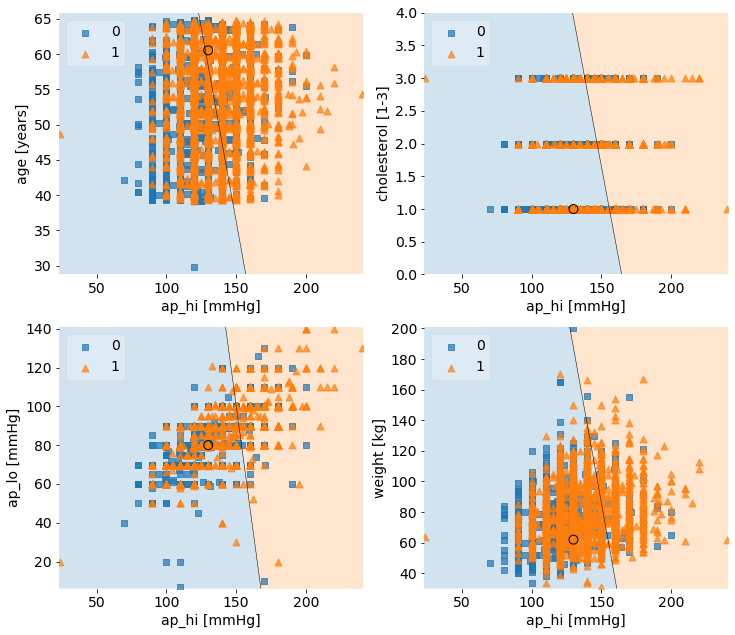

In [19]:
plt.rcParams.update({'font.size': 14})
fig, axarr = plt.subplots(2, 2, figsize=(12,8), sharex=True, sharey=False)
create_decision_plot(X_test, y_test, log_result, [5, 1], ['ap_hi [mmHg]', 'age [years]'], 
                     X_highlight, filler_feature_values, filler_feature_ranges, ax=axarr.flat[0])
create_decision_plot(X_test, y_test, log_result, [5, 7], ['ap_hi [mmHg]', 'cholesterol [1-3]'], 
                     X_highlight, filler_feature_values, filler_feature_ranges, ax=axarr.flat[1])
create_decision_plot(X_test, y_test, log_result, [5, 6], ['ap_hi [mmHg]', 'ap_lo [mmHg]'], 
                     X_highlight, filler_feature_values, filler_feature_ranges, ax=axarr.flat[2])
create_decision_plot(X_test, y_test, log_result, [5, 4], ['ap_hi [mmHg]', 'weight [kg]'], 
                     X_highlight, filler_feature_values, filler_feature_ranges, ax=axarr.flat[3])
plt.subplots_adjust(top = 1, bottom=0, hspace=0.2, wspace=0.2)
plt.show()

/usr/local/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


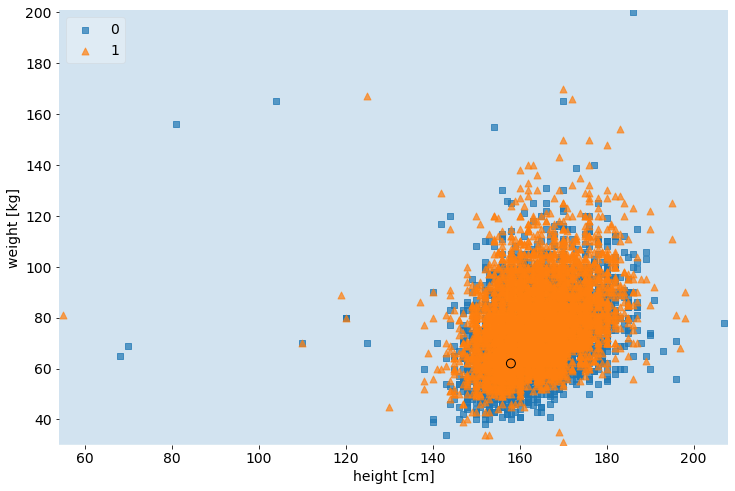

In [20]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
create_decision_plot(X_test, y_test, log_result, [3, 4], ['height [cm]', 'weight [kg]'], 
                     X_highlight, filler_feature_values, filler_feature_ranges, ax=ax)
plt.show()

In [21]:
X2 = cvd_df.drop(['cardio'], axis=1).copy()
X2["bmi"] = X2["weight"] / (X2["height"]/100)**2
X2_train, X2_test, _, _ = train_test_split(X2, y, test_size=0.15, random_state=9)

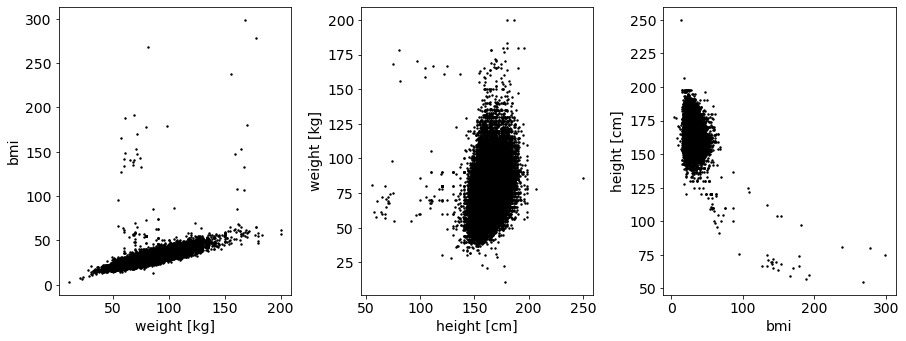

In [22]:
fig, axs = plt.subplots(1,3, figsize=(15,4))
plt.rcParams.update({'font.size': 14})
axs[0].scatter(X2["weight"], X2["bmi"],  color='black', s=2)
axs[0].set_xlabel('weight [kg]')
axs[0].set_ylabel('bmi')
axs[1].scatter(X2["height"], X2["weight"],  color='black', s=2)
axs[1].set_xlabel('height [cm]')
axs[1].set_ylabel('weight [kg]')
axs[2].scatter(X2["bmi"], X2["height"],  color='black', s=2)
axs[2].set_xlabel('bmi')
axs[2].set_ylabel('height [cm]')
plt.subplots_adjust(top = 1, bottom=0, hspace=0.2, wspace=0.3)
plt.show()

In [23]:
log_model2 = sm.Logit(y_train, sm.add_constant(X2_train))
log_result2 = log_model2.fit()

Optimization terminated successfully.
         Current function value: 0.561549
         Iterations 6


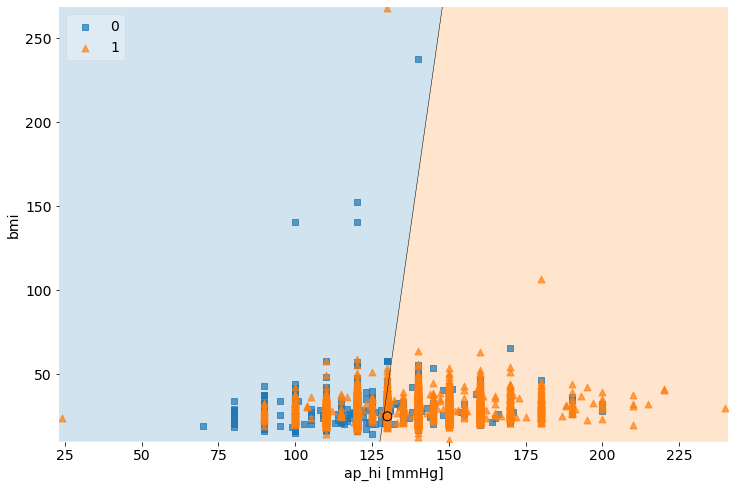

In [24]:
filler_feature_values2 = {0: 1, 1: 60, 2: 1, 3: 165, 4: 57, 5: 110, 
                       6: 70, 7: 1, 8: 1, 9: 0, 10:0, 11:1, 12:20
                    }
filler_feature_ranges2 = {0: 1, 1: 35, 2: 2, 3: 120, 4: 150, 5: 140, 
                       6: 70, 7: 3, 8: 3, 9: 2, 10:2, 11:2, 12:250
                      }
X2_highlight = np.reshape(np.concatenate(([1],X2_test.iloc[2872].to_numpy())), (1, 13))
fig, ax = plt.subplots(1,1, figsize=(12,8))
create_decision_plot(X2_test, y_test, log_result2, [5, 12], ['ap_hi [mmHg]', 'bmi'], 
                     X2_highlight, filler_feature_values2, filler_feature_ranges2, ax=ax)
plt.show()